In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
df.shape

(32561, 15)

In [100]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [101]:
numerical = df.select_dtypes(include=['int64', 'float64'])
categorical = df.select_dtypes(include=['object'])

In [102]:
numerical

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [103]:
print(type(numerical))

<class 'pandas.core.frame.DataFrame'>


In [104]:
numerical.isnull().sum()

age                0
 fnlwgt            0
 education-num     0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
dtype: int64

In [105]:
numerical = pd.DataFrame(numerical)

In [106]:
categorical

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [107]:
print(df.columns)


Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')


In [108]:
df[' race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

In [109]:
df[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

In [110]:
df[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

Visualization of Categorical data for easier interpretention

# Univariate Analaysis

In [111]:
categorical

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [112]:
categorical[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

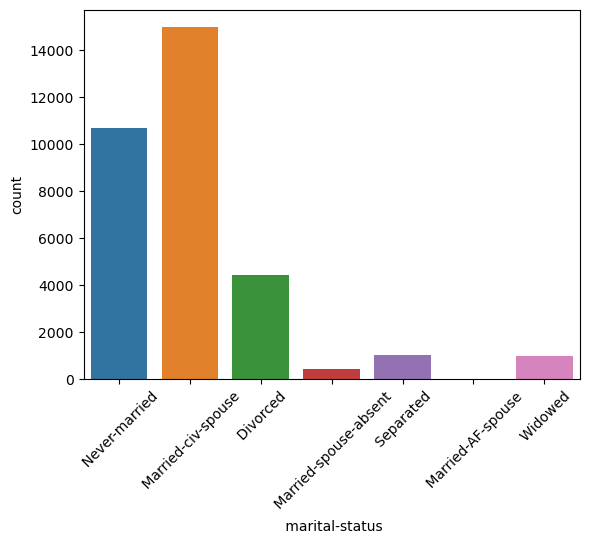

In [113]:
sns.countplot(data=categorical, x=" marital-status")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

<AxesSubplot:>

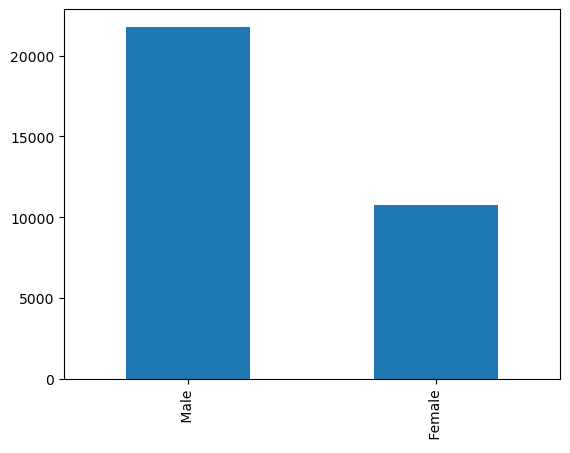

In [114]:
categorical[' sex'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel=' workclass'>

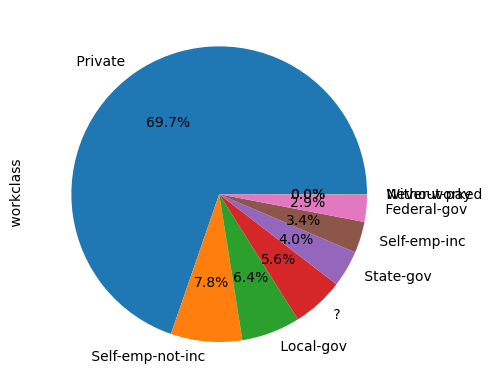

In [115]:
categorical[' workclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

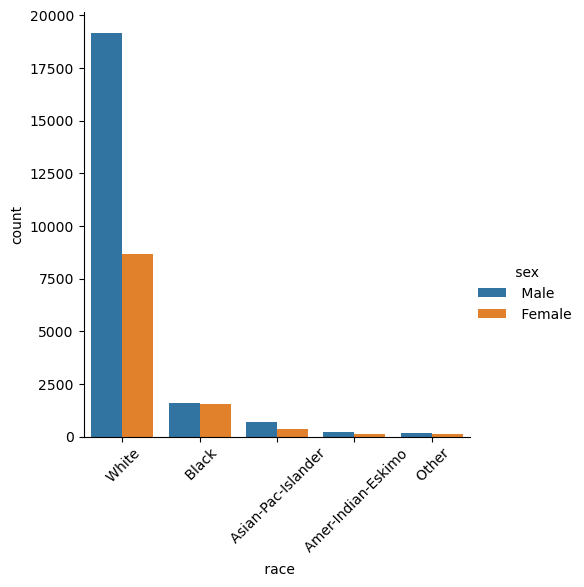

In [116]:
sns.catplot(data=categorical, x=" race", hue=" sex", kind="count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


<Figure size 1200x800 with 0 Axes>

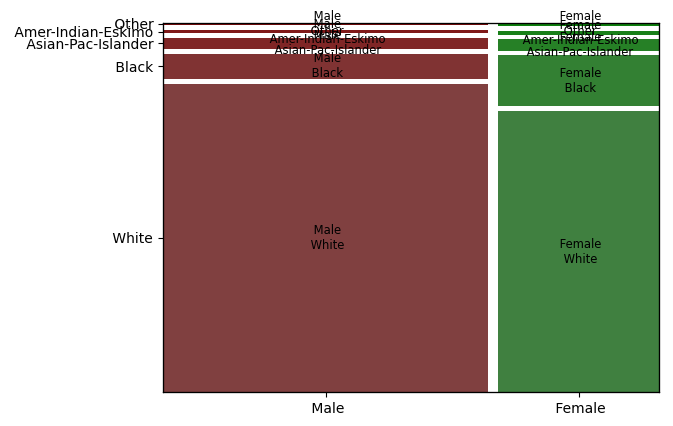

In [117]:
# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(12, 8))
mosaic(categorical, [' sex', ' race'], gap=0.02)
plt.show()


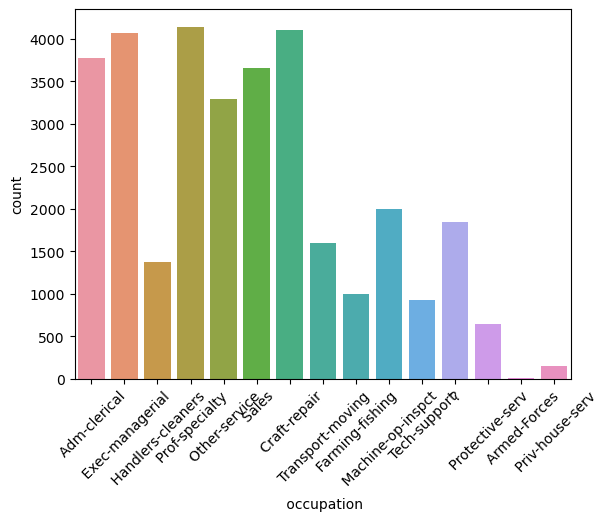

In [118]:
sns.countplot(data=categorical, x=" occupation")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

In [119]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(drop='first')

In [120]:
oe_sex = oe.fit_transform(categorical[[' sex']]).toarray()

In [121]:
oe_income = oe.fit_transform(categorical[[' income']]).toarray()

In [122]:
print(oe_sex)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]


In [123]:
print(oe_income)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]


In [124]:
# Drop the original 'sex' column
categorical = categorical.drop(' sex', axis=1)

In [125]:
# Drop the original 'income' column
categorical = categorical.drop(' income', axis=1)

In [126]:
# Convert the array back into a DataFrame
oe_sex_df = pd.DataFrame(oe_sex, columns=['sex_male'])

In [127]:
# Convert the array back into a DataFrame
oe_income_df = pd.DataFrame(oe_income, columns=['income_binary'])

In [128]:
# Concatenate the original DataFrame with the new one-hot encoded DataFrame
processed_categorical = pd.concat([categorical, oe_sex_df, oe_income_df], axis=1)

In [129]:
processed_categorical

,workclass,education,marital-status,occupation,relationship,race,native-country,sex_male,income_binary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States,1.0,0.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States,1.0,0.0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States,1.0,0.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States,1.0,0.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States,0.0,0.0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States,1.0,1.0
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States,0.0,0.0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States,1.0,0.0


In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [131]:
label_encoder = LabelEncoder()
categorical_cols = [' workclass', ' education', ' race', ' marital-status', ' occupation', ' relationship', ' native-country']

In [132]:
for cols in categorical_cols:
    processed_categorical[cols] = le.fit_transform(categorical[cols])

In [133]:
processed_categorical

,workclass,education,marital-status,occupation,relationship,race,native-country,sex_male,income_binary
0,7,9,4,1,1,4,39,1.0,0.0
1,6,9,2,4,0,4,39,1.0,0.0
2,4,11,0,6,1,4,39,1.0,0.0
3,4,1,2,6,0,2,39,1.0,0.0
4,4,9,2,10,5,2,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,39,0.0,0.0
32557,4,11,2,7,0,4,39,1.0,1.0
32558,4,11,6,1,4,4,39,0.0,0.0
32559,4,11,4,1,3,4,39,1.0,0.0


In [134]:
processed_df = pd.concat([numerical, processed_categorical], axis=1)

In [135]:
processed_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,native-country,sex_male,income_binary
0,39,77516,13,2174,0,40,7,9,4,1,1,4,39,1.0,0.0
1,50,83311,13,0,0,13,6,9,2,4,0,4,39,1.0,0.0
2,38,215646,9,0,0,40,4,11,0,6,1,4,39,1.0,0.0
3,53,234721,7,0,0,40,4,1,2,6,0,2,39,1.0,0.0
4,28,338409,13,0,0,40,4,9,2,10,5,2,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,4,7,2,13,5,4,39,0.0,0.0
32557,40,154374,9,0,0,40,4,11,2,7,0,4,39,1.0,1.0
32558,58,151910,9,0,0,40,4,11,6,1,4,4,39,0.0,0.0
32559,22,201490,9,0,0,20,4,11,4,1,3,4,39,1.0,0.0


In [137]:
processed_df.isnull().sum()

age                0
 fnlwgt            0
 education-num     0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 workclass         0
 education         0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 native-country    0
sex_male           0
income_binary      0
dtype: int64

# Checking for outliers

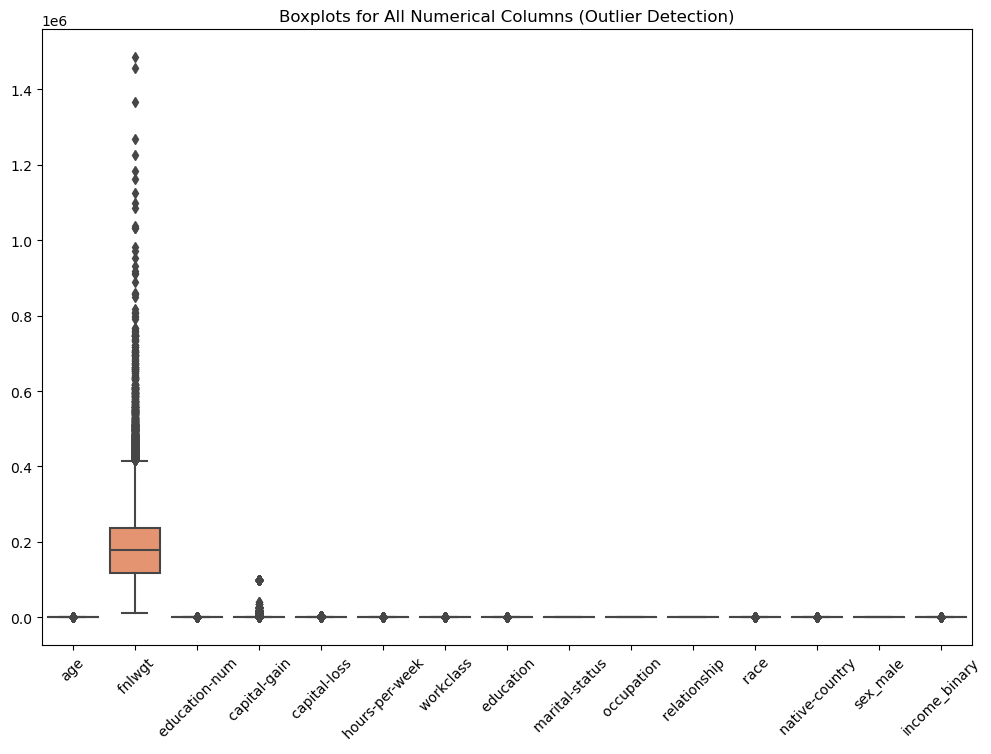

In [138]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=processed_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplots for All Numerical Columns (Outlier Detection)')
plt.show()


Outliers (seperately)

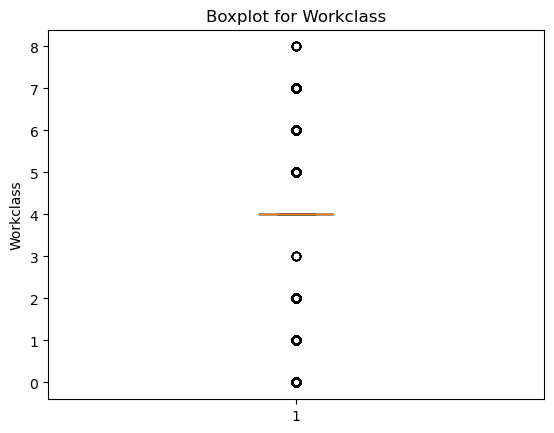

In [139]:
# Creating a boxplot for the 'workclass' column (now that it's numeric)
plt.boxplot(processed_df[' workclass'])
plt.title('Boxplot for Workclass')
plt.ylabel('Workclass')
plt.show()


In [140]:
processed_df[' workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name:  workclass, dtype: int64

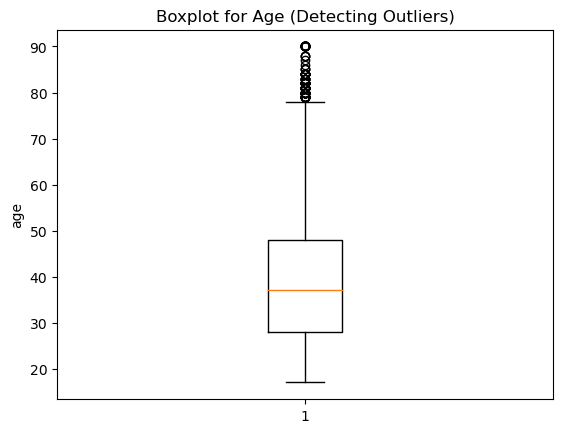

In [141]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df['age'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('age')
plt.show()


In [142]:
processed_df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

Detected outliers

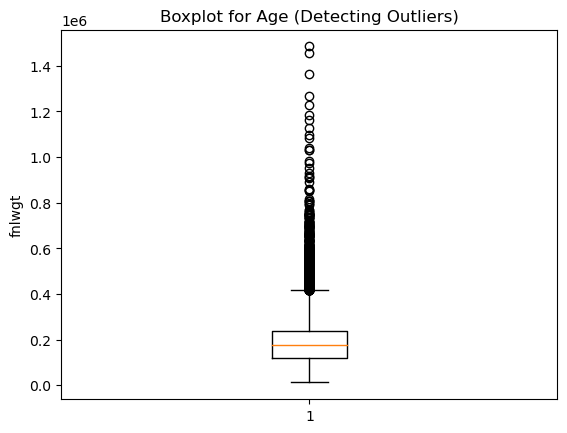

In [143]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' fnlwgt'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('fnlwgt')
plt.show()


In [144]:
processed_df[' fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name:  fnlwgt, Length: 21648, dtype: int64

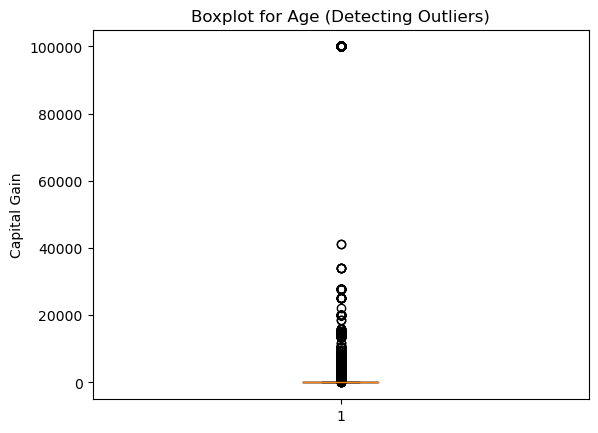

In [145]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' capital-gain'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Capital Gain')
plt.show()


In [146]:
processed_df[' capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name:  capital-gain, Length: 119, dtype: int64

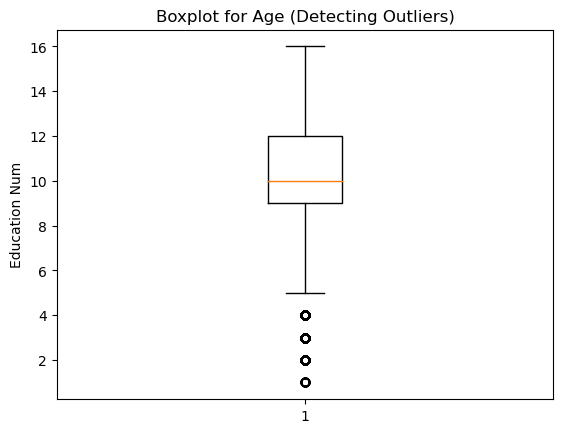

In [147]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' education-num'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Education Num')
plt.show()


In [148]:
processed_df[' education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name:  education-num, dtype: int64

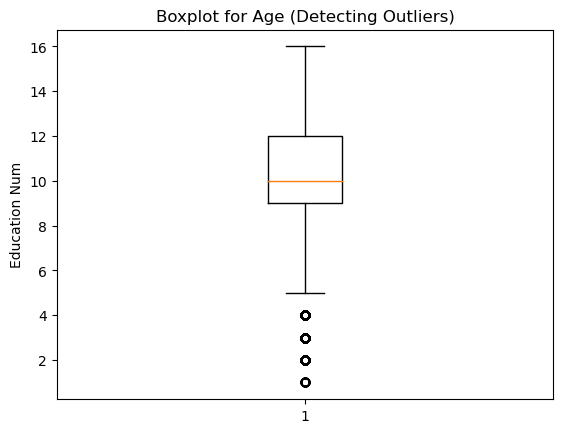

In [149]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' education-num'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Education Num')
plt.show()


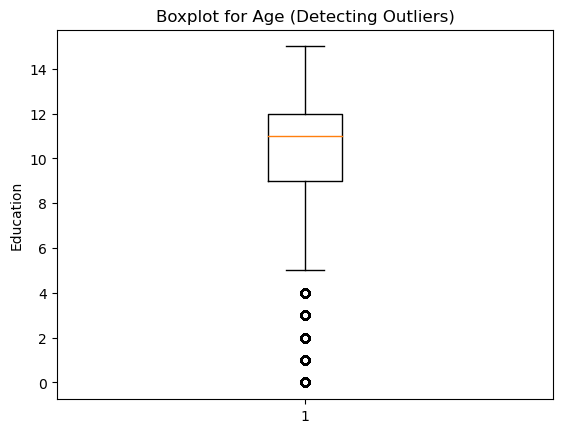

In [150]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' education'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Education')
plt.show()


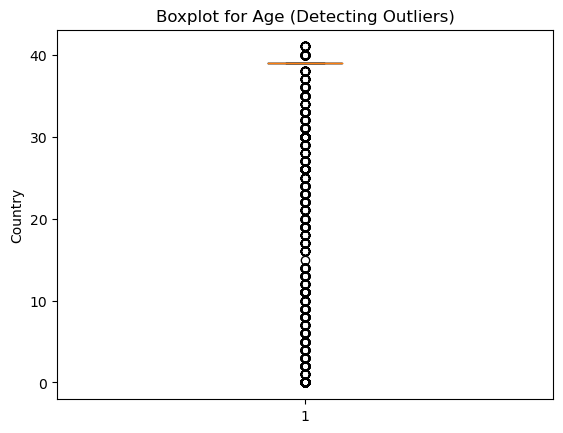

In [151]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' native-country'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Country')
plt.show()


In [152]:
processed_df[' native-country'].value_counts()

39    29170
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name:  native-country, dtype: int64

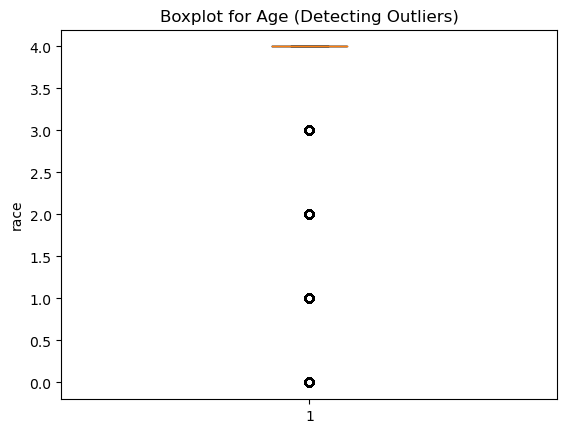

In [153]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' race'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('race')
plt.show()


In [154]:
processed_df[' race'].value_counts()

4    27816
2     3124
1     1039
0      311
3      271
Name:  race, dtype: int64

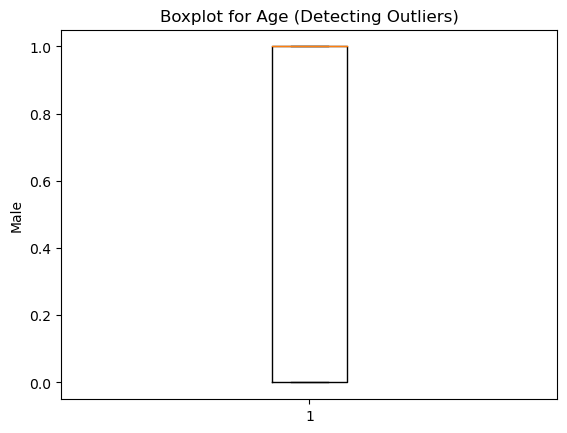

In [155]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df['sex_male'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Male')
plt.show()


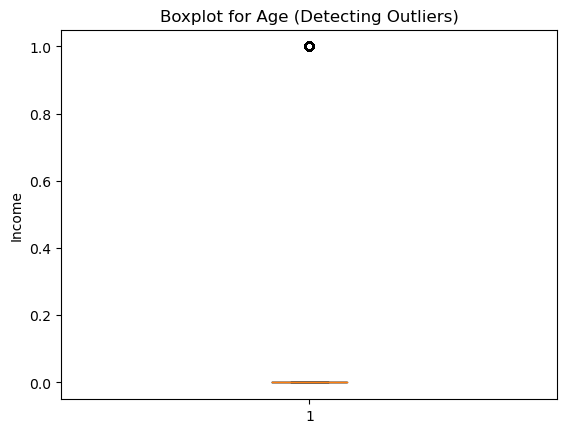

In [156]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df['income_binary'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Income')
plt.show()


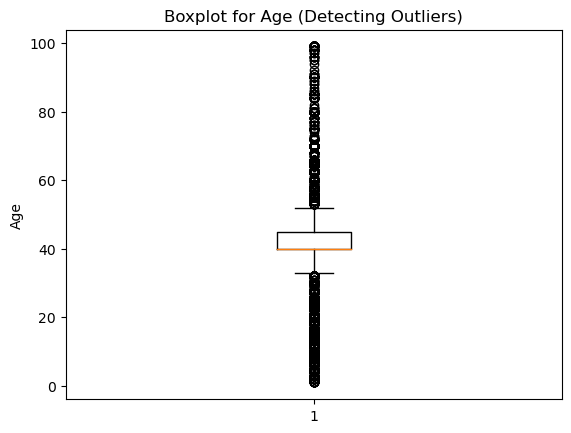

In [157]:


# Creating a boxplot using matplotlib
plt.boxplot(processed_df[' hours-per-week'])  # Assuming 'age' is a numerical column
plt.title('Boxplot for Age (Detecting Outliers)')
plt.ylabel('Age')
plt.show()


In [158]:
processed_df.columns

Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' workclass', ' education', ' marital-status',
       ' occupation', ' relationship', ' race', ' native-country', 'sex_male',
       'income_binary'],
      dtype='object')

Outliers (all together)

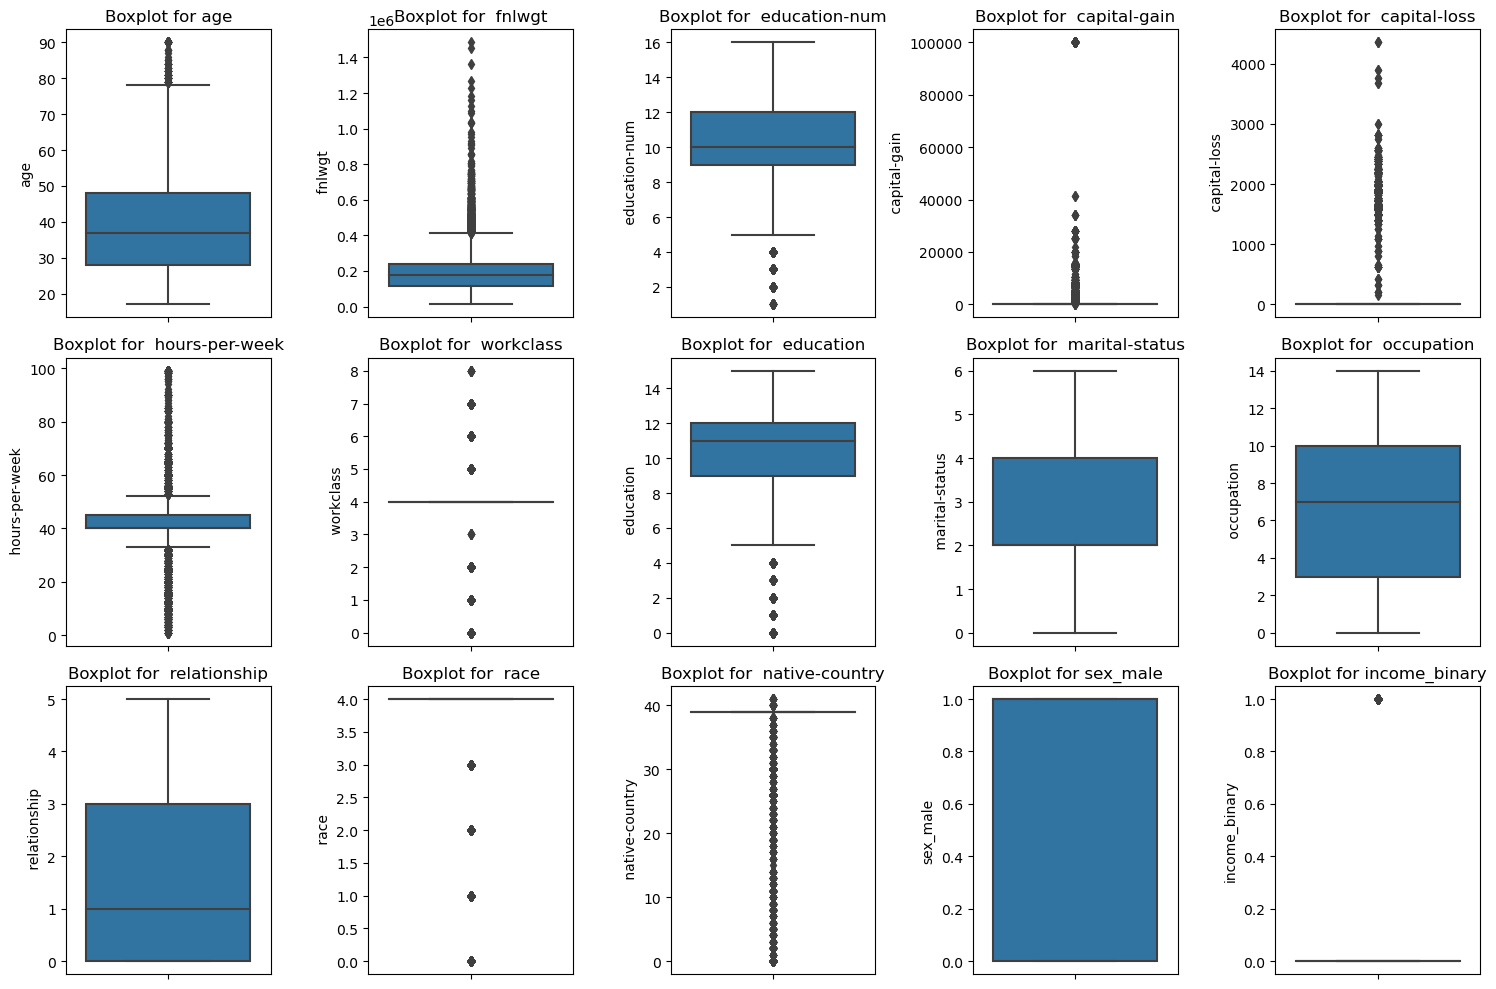

In [159]:
# Define the numerical columns
numerical_columns = ['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week', ' workclass', ' education', ' marital-status',
       ' occupation', ' relationship', ' race', ' native-country', 'sex_male',
       'income_binary']

# Create subplots: Adjust 'nrows' and 'ncols' depending on how many plots you want per row
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through numerical columns and their respective axis to plot
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=processed_df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}', fontsize=12)

# Remove any extra subplots (if you have fewer columns than subplots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Note: Detected outlier, now we have the choice to either do Robust Scaling or Z-score evaluation

# Robust Scaling

In [187]:
from sklearn.preprocessing import RobustScaler

# Define columns that have outliers
numerical_columns = ['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week'] 

robust_scaler = RobustScaler()

# calculate median and IQR  
robust_scaler.fit_transform(processed_df[numerical_columns])
 
# scale all data points using median and IQR
robust_scaled_data = robust_scaler.transform(processed_df[numerical_columns])

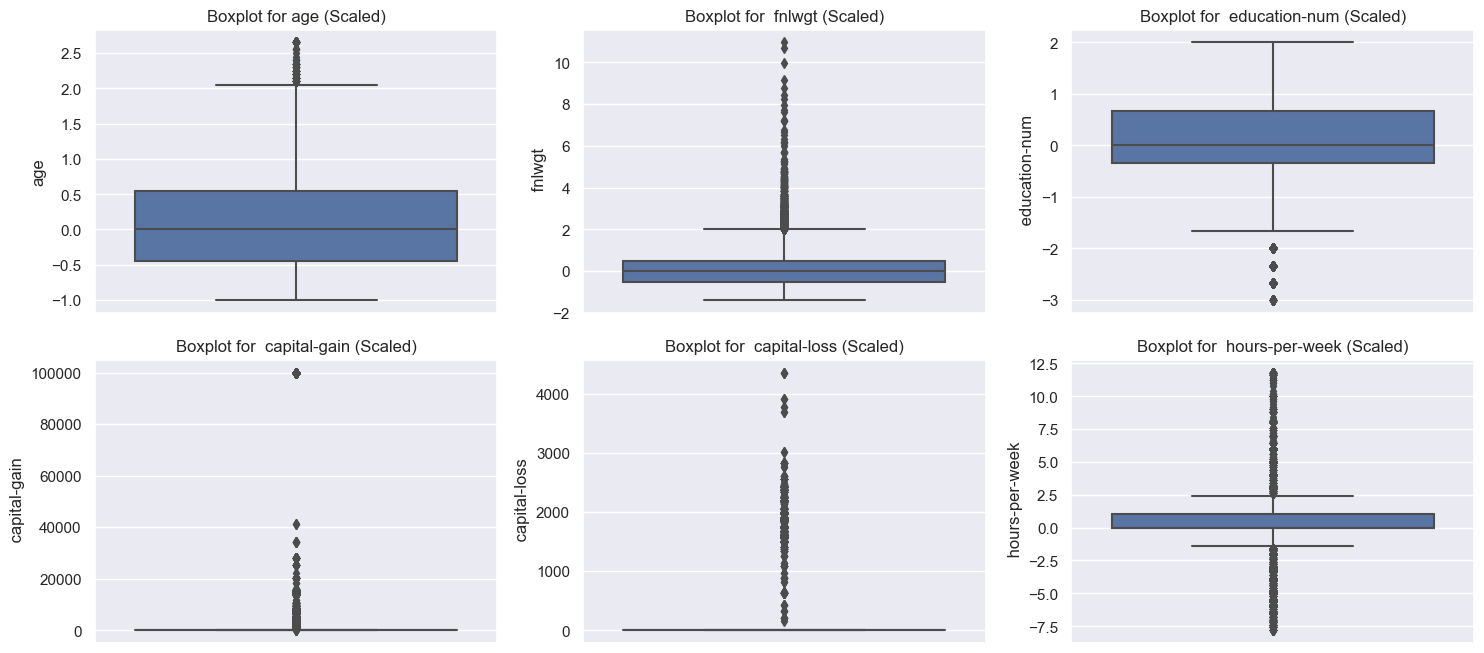

In [188]:
# Scale the numerical columns using median and IQR
robust_scaled_data = robust_scaler.fit_transform(processed_df[numerical_columns])

# Convert the scaled data back into a DataFrame with the same column names
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=numerical_columns, index=processed_df.index)

# Replace the original numerical columns in processed_df with the scaled columns
processed_df[numerical_columns] = robust_scaled_df

# Now processed_df contains the scaled numerical columns along with the rest of the data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Ensure that you only plot as many columns as you have subplots
for i, col in enumerate(processed_df.columns[:6]):  # Only take up to 6 columns
    sns.boxplot(data=processed_df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col} (Scaled)', fontsize=12)

# Remove any extra subplots (if you have fewer columns than subplots)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()

plt.show()

Note: If there were null values, we would've done imputation before proceeding

In [189]:
df_dropped = processed_df.drop('income_binary', axis=1)
X = df_dropped.iloc[:, :]

y = processed_df['income_binary']

In [190]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,native-country,sex_male
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,7,9,4,1,1,4,39,1.0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,6,9,2,4,0,4,39,1.0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,4,11,0,6,1,4,39,1.0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,4,1,2,6,0,2,39,1.0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,4,9,2,10,5,2,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.50,0.662165,0.666667,0.0,0.0,-0.4,4,7,2,13,5,4,39,0.0
32557,0.15,-0.201151,-0.333333,0.0,0.0,0.0,4,11,2,7,0,4,39,1.0
32558,1.05,-0.221818,-0.333333,0.0,0.0,0.0,4,11,6,1,4,4,39,0.0
32559,-0.75,0.194038,-0.333333,0.0,0.0,-4.0,4,11,4,1,3,4,39,1.0


In [191]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    1.0
32558    0.0
32559    0.0
32560    1.0
Name: income_binary, Length: 32561, dtype: float64

In [192]:
print(processed_df.columns)


Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' workclass', ' education', ' marital-status',
       ' occupation', ' relationship', ' race', ' native-country', 'sex_male',
       'income_binary'],
      dtype='object')


<Figure size 900x500 with 0 Axes>

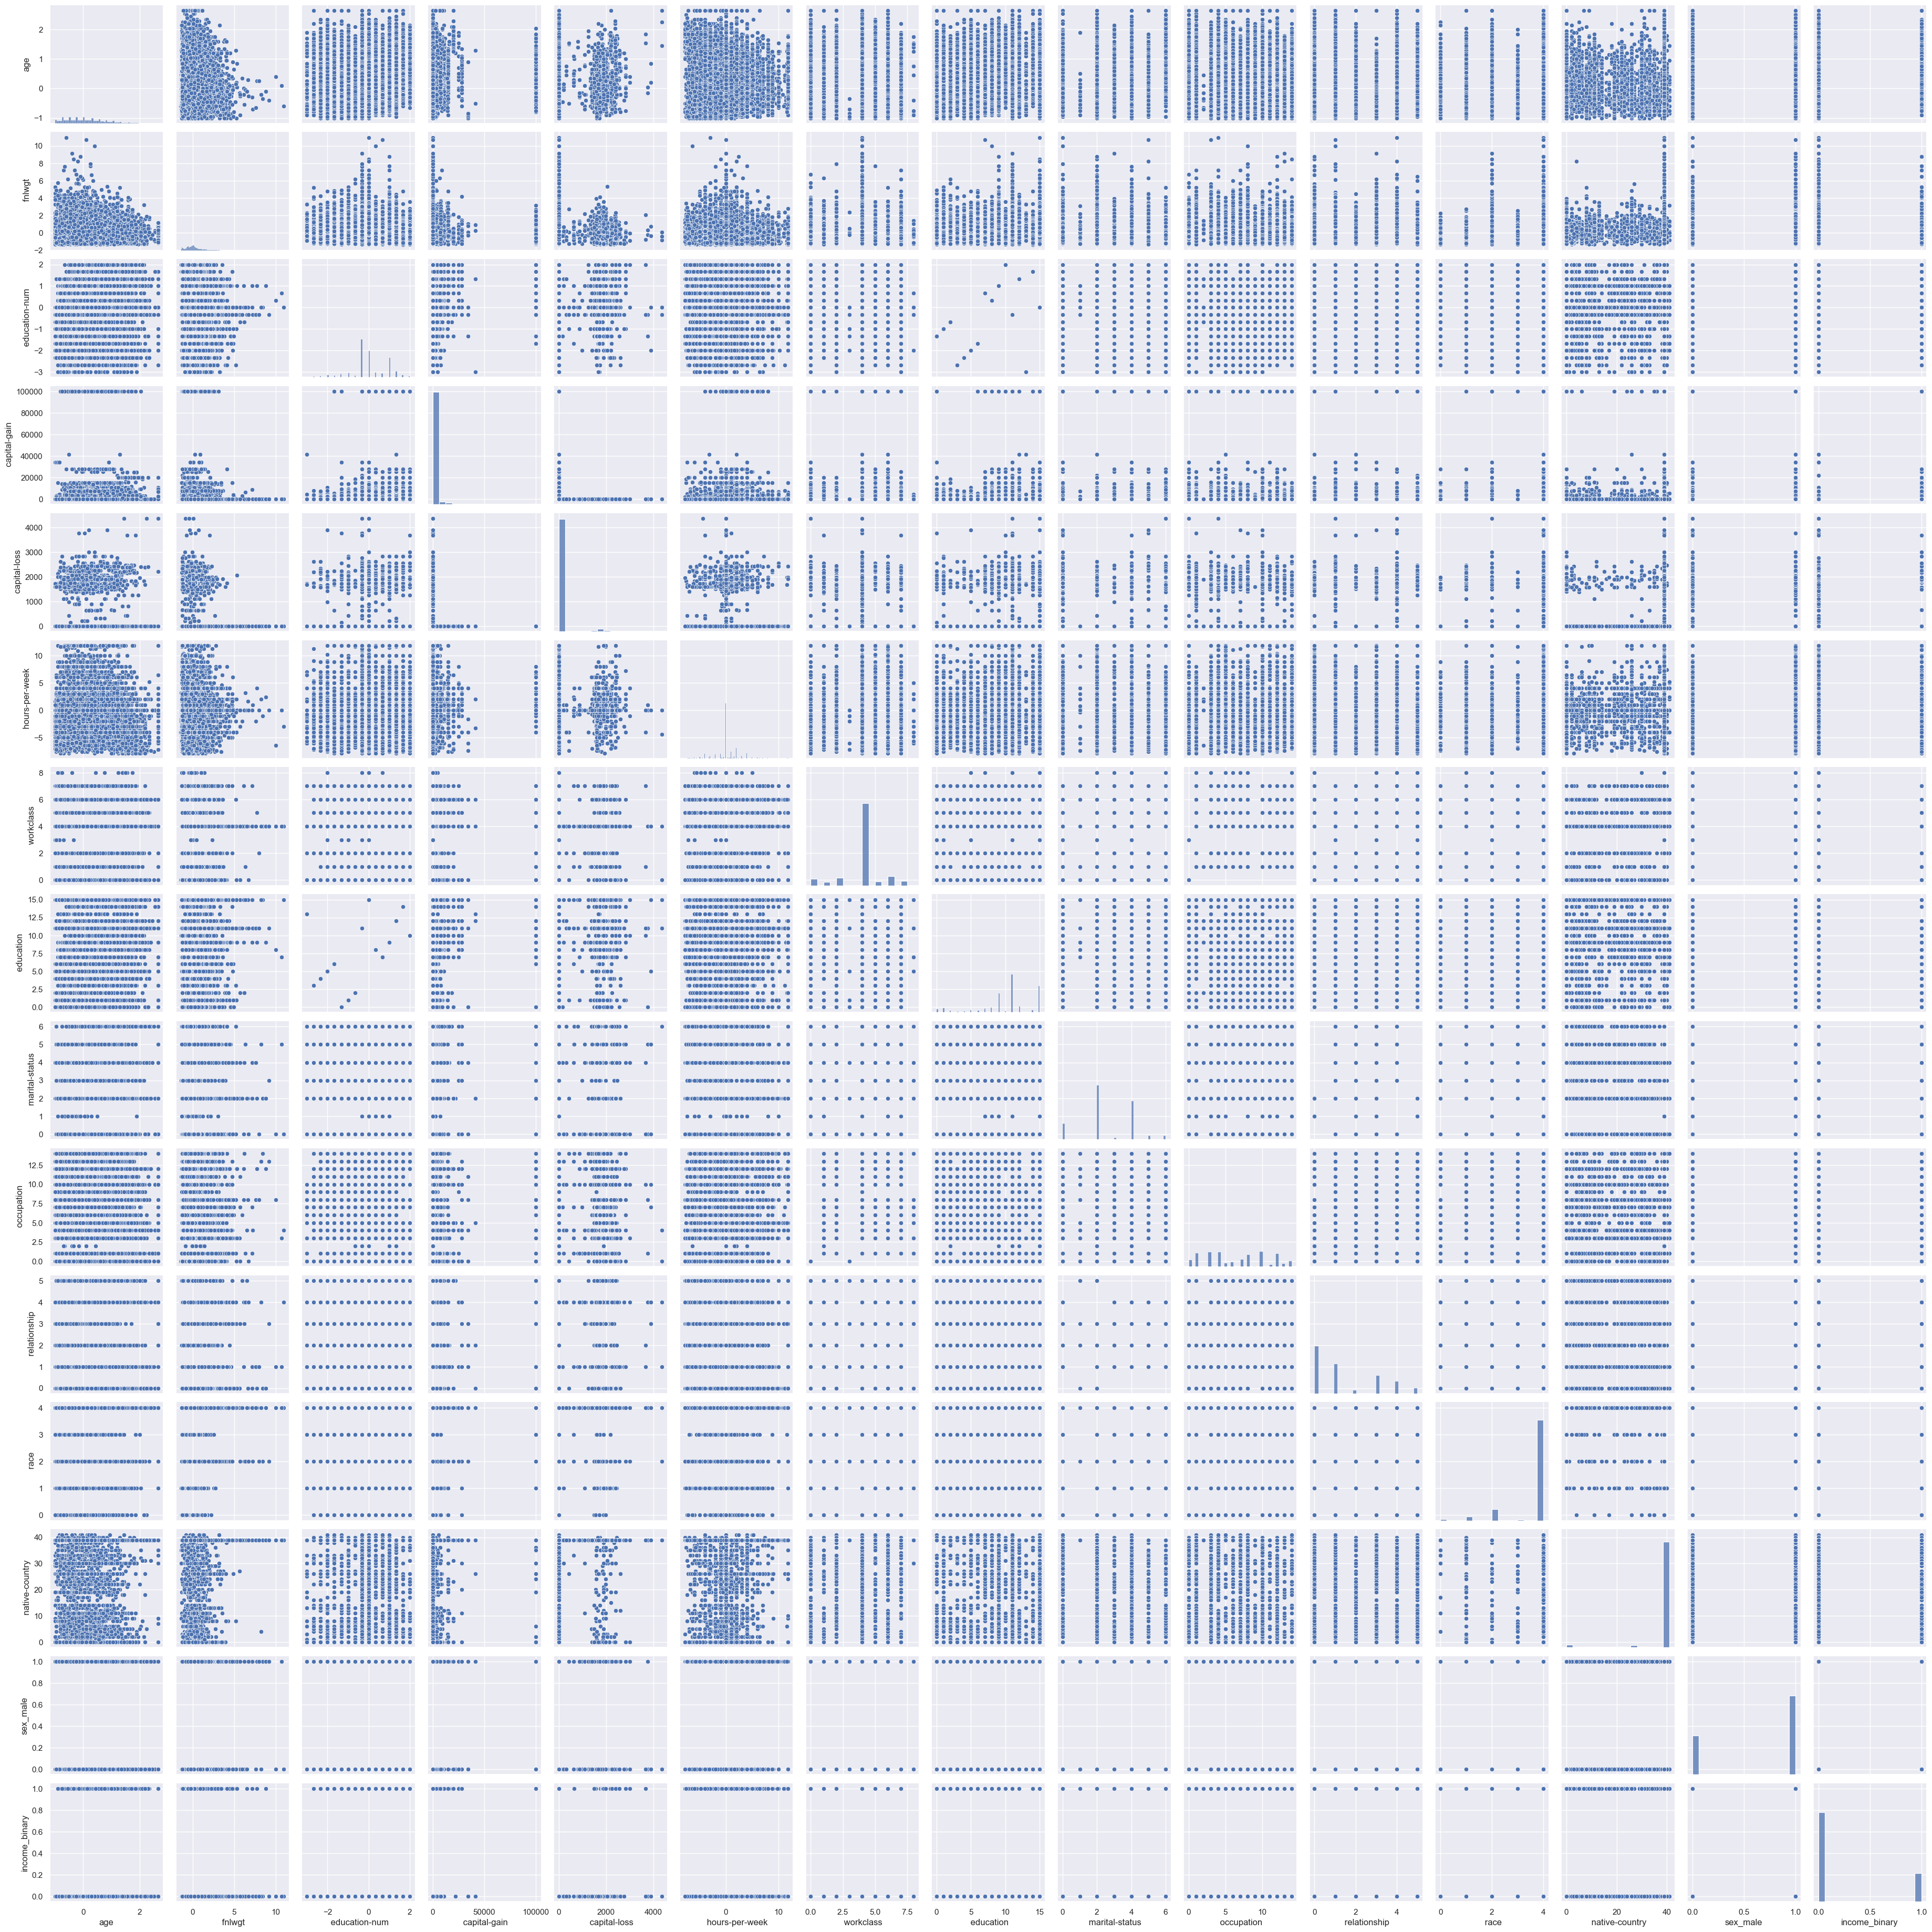

In [193]:
plt.figure(figsize=(9,5))

sns.pairplot(processed_df)
plt.show()

In [272]:
# Convert the 'sex_male' column to integers
#processed_df['sex_male'] = processed_df['sex_male'].astype(int)

In [273]:
# Convert the 'sex_male' column to integers
#processed_df['income_binary'] = processed_df['sex_male'].astype(int)

In [194]:
processed_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,native-country,sex_male,income_binary
0,0.10,-0.845803,1.000000,2174.0,0.0,0.0,7,9,4,1,1,4,39,1.0,0.0
1,0.65,-0.797197,1.000000,0.0,0.0,-5.4,6,9,2,4,0,4,39,1.0,0.0
2,0.05,0.312773,-0.333333,0.0,0.0,0.0,4,11,0,6,1,4,39,1.0,0.0
3,0.80,0.472766,-1.000000,0.0,0.0,0.0,4,1,2,6,0,2,39,1.0,0.0
4,-0.45,1.342456,1.000000,0.0,0.0,0.0,4,9,2,10,5,2,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.50,0.662165,0.666667,0.0,0.0,-0.4,4,7,2,13,5,4,39,0.0,0.0
32557,0.15,-0.201151,-0.333333,0.0,0.0,0.0,4,11,2,7,0,4,39,1.0,1.0
32558,1.05,-0.221818,-0.333333,0.0,0.0,0.0,4,11,6,1,4,4,39,0.0,0.0
32559,-0.75,0.194038,-0.333333,0.0,0.0,-4.0,4,11,4,1,3,4,39,1.0,0.0


# Note: Univariate analysis can be visualized by histograms, bar charts, pie charts and box plots. Box plots are efficient to detect outliers

Visualization for numerical and converted categorical data

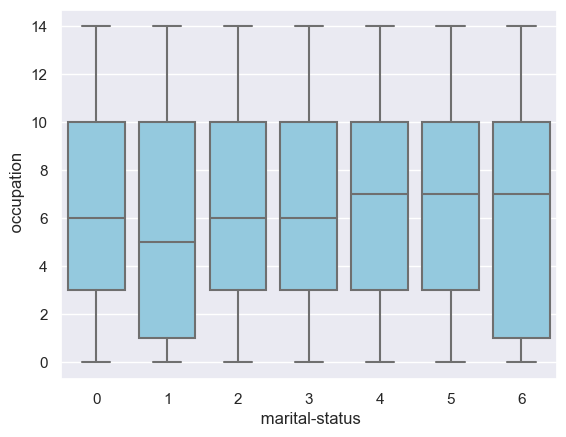

In [170]:
# Bi-variate analysis
sns.set_theme(style="darkgrid")

sns.boxplot(x=processed_df[' marital-status'], y=processed_df[' occupation'], color='skyblue')
plt.show()

<AxesSubplot:xlabel=' race', ylabel='Count'>

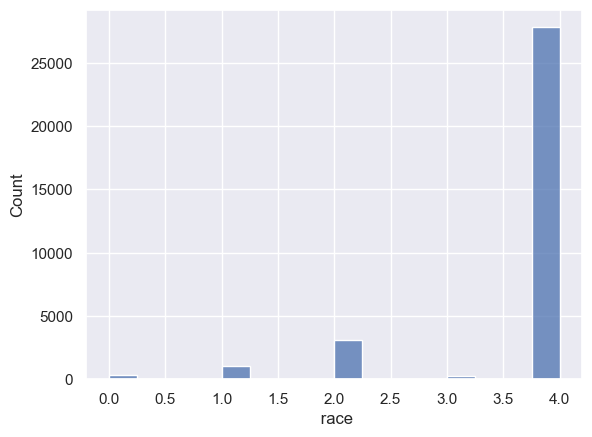

In [171]:
# Univariate analysis
sns.histplot(data=processed_df, x=" race")

<AxesSubplot:>

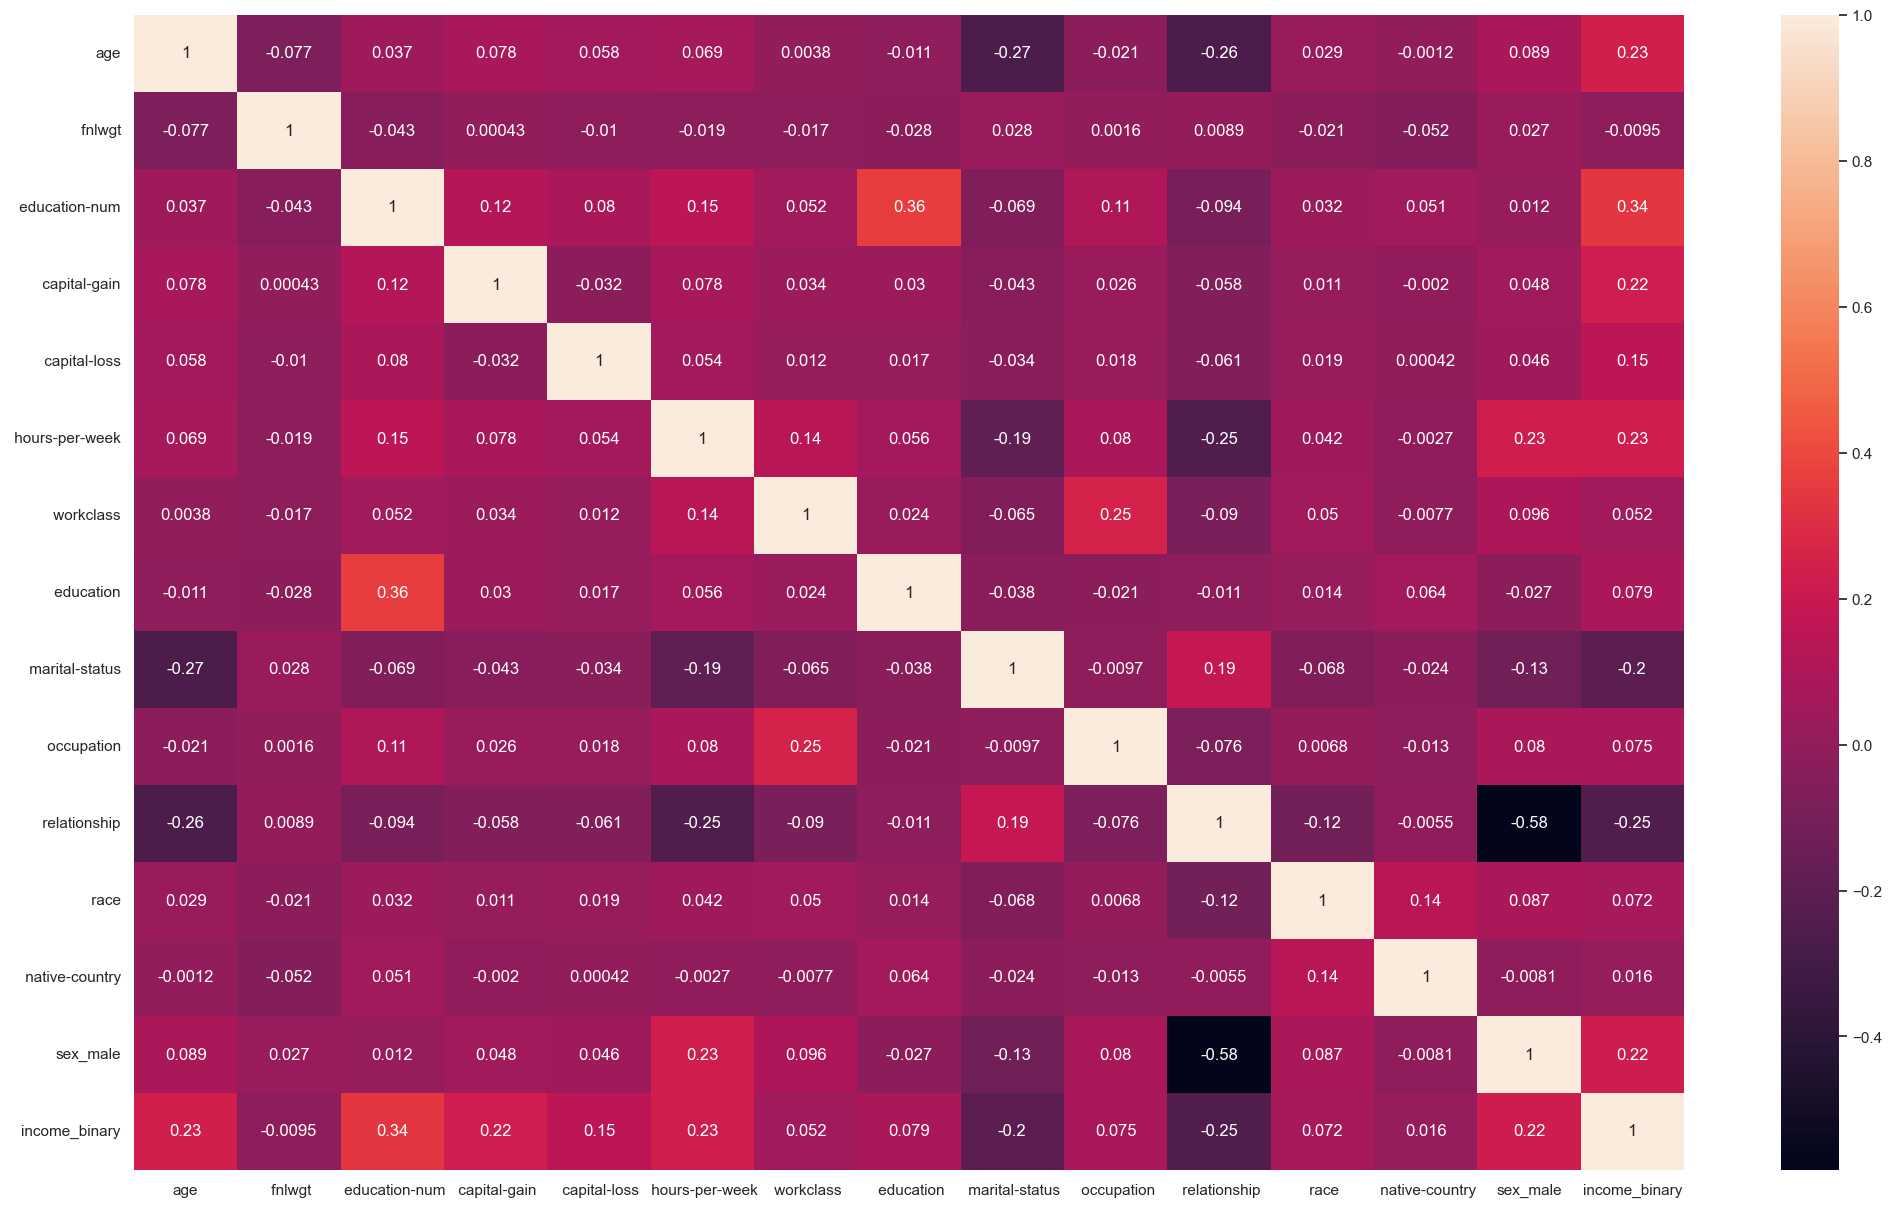

In [172]:
# Multivariate Analysis
top_features = processed_df.corr().index
plt.figure(figsize=(25,15))
sns.heatmap(processed_df.corr(),annot=True)

# From the heatmap - Stress Level & Sleep Duration is correlated
# which is 0.81

# Checking for imbalanced data

In [173]:
y.value_counts()

0.0    24720
1.0     7841
Name: income_binary, dtype: int64

In [174]:
# Map the classes in y
y_labeled = y.map({0.0: 'Class 1', 1.0: 'Class 2'})

# Check the mapping
print(y_labeled.value_counts())


Class 1    24720
Class 2     7841
Name: income_binary, dtype: int64


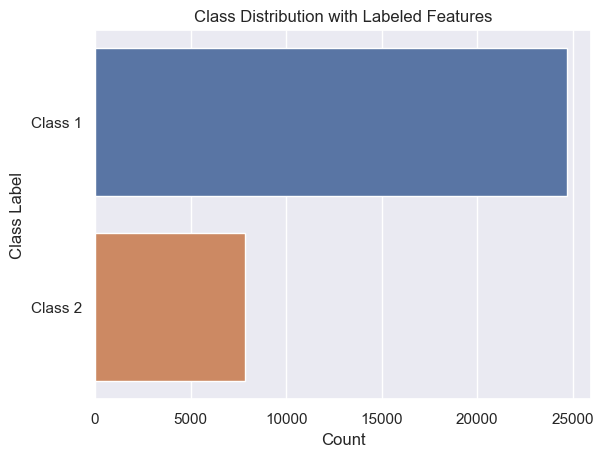

In [175]:


# Visualize the imbalance
sns.countplot(y=y_labeled)
plt.title('Class Distribution with Labeled Features')
plt.xlabel('Count')
plt.ylabel('Class Label')
plt.show()


There won't be any scatter plot since x is a 2D array and y is a 1D array

In [176]:
# Separate the data for class 0 (Feature 1) and class 1 (Feature 2)
#X_feature_1 = X[y == 0.0]  # Feature 1 (Class 0)
#X_feature_2 = X[y == 1.0]  # Feature 2 (Class 1)

# Scatter plot with Feature 1 on x-axis and Feature 2 on y-axis
#plt.figure(figsize=(10, 6))
#plt.scatter(X_feature_1['age'], X_feature_2['age'], color='green', label='Feature 1 vs Feature 2')

# Add plot details
#plt.title('Scatter Plot: Feature 1 (Class 0) vs Feature 2 (Class 1)')
#plt.xlabel('Feature 1 (Class 0)')
#plt.ylabel('Feature 2 (Class 1)')
#plt.legend()
#plt.grid(True)
#plt.show()



# Spliting the data into training and testing sets

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

Using selectkbest and f_classification,
it would have been f_regression if the task was to do regression

In [196]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with f_classification
k = 10  # Select top 5 features, change 'k' to choose the number of top features you need
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to the data
X_new = selector.fit(X, y)

# Get the scores of the features
feature_scores = selector.scores_

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Display the feature scores and selected features
print("Feature Scores:\n", feature_scores)
print("Selected Features:\n", selected_features)


Feature Scores:
 [1.88670731e+03 2.91559359e+00 4.12009578e+03 1.70915006e+03
 7.54830452e+02 1.81338628e+03 8.69361605e+01 2.06129509e+02
 1.34685178e+03 1.86500322e+02 2.18764583e+03 1.68934788e+02
 8.17155711e+00 1.59310791e+03]
Selected Features:
 Index(['age', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' education', ' marital-status', ' occupation',
       ' relationship', 'sex_male'],
      dtype='object')


# Applying smote analysis for imbalanced data (target feature)

In [197]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [198]:
print(X_resampled_smote.shape,'\n',y_resampled_smote.shape)

(39556, 14) 
 (39556,)


In [199]:
# Before applying SMOTE
print("Before SMOTE: ", X_train.shape)

print("Before SMOTE:")
print(y_train.value_counts())

# After applying SMOTE
print("After SMOTE: ", X_resampled_smote.shape)

# After applying SMOTE
print("After SMOTE:")
print(y_resampled_smote.value_counts())

Before SMOTE:  (26048, 14)
Before SMOTE:
0.0    19778
1.0     6270
Name: income_binary, dtype: int64
After SMOTE:  (39556, 14)
After SMOTE:
1.0    19778
0.0    19778
Name: income_binary, dtype: int64


Optional steps to visualize the effect of smote analysis

In [200]:
# Check if columns remain the same before and after SMOTE
columns_before = set(X_train.columns)
columns_after = set(X_resampled_smote.columns)

if columns_before == columns_after:
    print("Columns are unchanged after SMOTE.")
else:
    print("Columns have changed after SMOTE.")


Columns are unchanged after SMOTE.


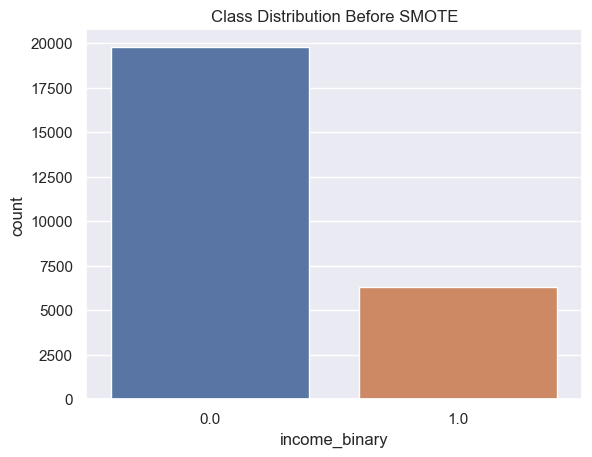

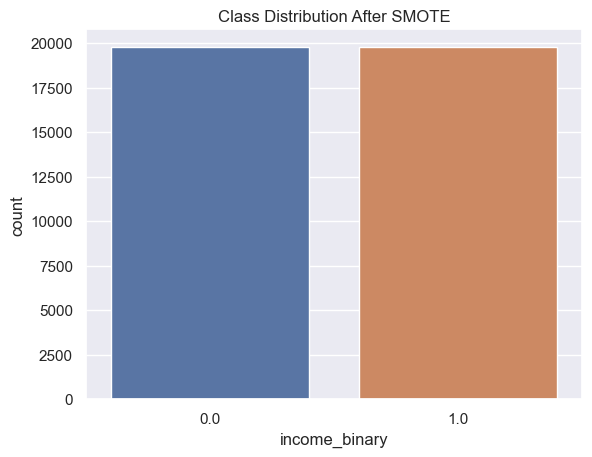

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution before SMOTE
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.show()

# Distribution after SMOTE
sns.countplot(x=y_resampled_smote)
plt.title("Class Distribution After SMOTE")
plt.show()


# Applying Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

For classification, we use 'entropy' in Decision Tree

In [203]:
# Train and Evaluate the Model on the Original Dataset (Entropy)
dtc_original = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtc_original.fit(X_train, y_train)
y_pred_original = dtc_original.predict(X_test)
print("Classification Report for Original Dataset:")
print(classification_report(y_pred_original, y_test))

Classification Report for Original Dataset:
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      5480
         1.0       0.52      0.79      0.62      1033

    accuracy                           0.85      6513
   macro avg       0.74      0.82      0.76      6513
weighted avg       0.89      0.85      0.86      6513



In [204]:
print(accuracy_score(y_pred_original, y_test))

0.8492246276677414


In [205]:
# Train and Evaluate the Model on the SMOTE Resampled Dataset (Entropy)
dtc_smote1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtc_smote1.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote1 = dtc_smote1.predict(X_test)
print("Classification Report for SMOTE Resampled Dataset:")
print(classification_report(y_test, y_pred_smote1))

Classification Report for SMOTE Resampled Dataset:
              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85      4942
         1.0       0.54      0.83      0.66      1571

    accuracy                           0.79      6513
   macro avg       0.74      0.80      0.75      6513
weighted avg       0.84      0.79      0.80      6513



In [206]:
print(accuracy_score(y_pred_smote1, y_test))

0.7905727007523414


# Applying Naive Bias

In [207]:
from sklearn.naive_bayes import GaussianNB

In [208]:
# Initialize the Gaussian Naive Bayes model
naive_bayes = GaussianNB()

# Train the model on the resampled data
naive_bayes.fit(X_resampled_smote, y_resampled_smote)

GaussianNB()

In [209]:
# Make predictions on the test set
y_pred_nb = naive_bayes.predict(X_test)

In [210]:
# Evaluate the performance of the Naive Bayes model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 0.8225088284968525

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      4942
         1.0       0.69      0.47      0.56      1571

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.73      6513
weighted avg       0.81      0.82      0.81      6513


Confusion Matrix:
 [[4615  327]
 [ 829  742]]


In [212]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Accuracy of Naive Bayes Model:", accuracy)

Accuracy of Naive Bayes Model: 0.8225088284968525


# Using normalization for logistic regression

In [213]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
scaler = MinMaxScaler()

In [215]:
X_scaled = scaler.fit_transform(X)

In [216]:
# Convert back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [217]:
# Combine the scaled data with the 'Class' column
new_df_scaled = pd.concat([X_scaled, y], axis=1)

In [218]:
new_df_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,native-country,sex_male,income_binary
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.875,0.600000,0.666667,0.071429,0.2,1.0,0.951220,1.0,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.750,0.600000,0.333333,0.285714,0.0,1.0,0.951220,1.0,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.500,0.733333,0.000000,0.428571,0.2,1.0,0.951220,1.0,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.500,0.066667,0.333333,0.428571,0.0,0.5,0.951220,1.0,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.500,0.600000,0.333333,0.714286,1.0,0.5,0.121951,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.500,0.466667,0.333333,0.928571,1.0,1.0,0.951220,0.0,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.500,0.733333,0.333333,0.500000,0.0,1.0,0.951220,1.0,1.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.500,0.733333,1.000000,0.071429,0.8,1.0,0.951220,0.0,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.500,0.733333,0.666667,0.071429,0.6,1.0,0.951220,1.0,0.0


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Variance Threshold

In [220]:
from sklearn.feature_selection import VarianceThreshold

# Initialize the VarianceThreshold object with a specified threshold
selector = VarianceThreshold(threshold=0)

# Fit and transform the training data to remove low-variance features
X_train_selected = selector.fit_transform(X_train)

X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_columns)

# Print the number of selected columns
print(len(selected_columns))

14


In [221]:
selected_columns

Index(['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss',
       ' hours-per-week', ' workclass', ' education', ' marital-status',
       ' occupation', ' relationship', ' race', ' native-country', 'sex_male'],
      dtype='object')

In [222]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_selected_df, y_train)
print(mutual_info)

[0.06787933 0.02735418 0.06523689 0.08360444 0.03111076 0.04241616
 0.01769924 0.06446301 0.11263483 0.06275933 0.11931287 0.00959105
 0.0091716  0.02729278]


In [223]:
mutual_info = pd.Series(mutual_info, index=selected_columns)
mutual_info.index = X_train_selected_df.columns
mutual_info_series = mutual_info.sort_values(ascending = False)
print(mutual_info_series)

 relationship      0.119313
 marital-status    0.112635
 capital-gain      0.083604
age                0.067879
 education-num     0.065237
 education         0.064463
 occupation        0.062759
 hours-per-week    0.042416
 capital-loss      0.031111
 fnlwgt            0.027354
sex_male           0.027293
 workclass         0.017699
 race              0.009591
 native-country    0.009172
dtype: float64


In [224]:
top_features = mutual_info_series.head(10).index

In [225]:
X_train_top_features = X_train_selected_df[top_features]
X_test_top_features = X_test_selected_df[top_features]


In [226]:
print("Top features based on mutual information:")
for feature in top_features:
    print(feature)


Top features based on mutual information:
 relationship
 marital-status
 capital-gain
age
 education-num
 education
 occupation
 hours-per-week
 capital-loss
 fnlwgt


# Applying Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:,1]

print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      7455
         1.0       0.71      0.44      0.54      2314

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [228]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8243423072985976


In [214]:
# Do the categorical visualization before concatenating
# Find outliers
# Don't use gini in Decision Tree for classification
# Do the feature selection after the visualization
# Should not have used scatter plot for that, count plot is fine
# Complete bi-variate and multivariate analysis